In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time

In [2]:
data = np.loadtxt('data/latent_data.csv', delimiter=',')
print(data.shape)

labels = np.loadtxt('data/encoded_labels.csv')
print(labels.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

num_classes = len(np.unique(labels))
num_input=data.shape[1]

PC= 'Lenovo'
dataset= 'Pan'
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))
print ('All samples:', X_train.shape[0] + X_test.shape[0])

(6241, 128)
(6241,)
Shape of Train Data : (4992, 128)
Shape of Test Data : (1249, 128)
All samples: 6241


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(num_input,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
'''model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
'''
model.add(Dense(num_classes, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2023-03-07 01:06:32.390678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 01:06:32.533365: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 01:06:32.533387: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 01:06:33.221513: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 26,848
Trainable params: 26,848
Non-trainable params: 0
_________________________________________________________________


2023-03-07 01:06:34.018786: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-07 01:06:34.018823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alandoli-Lenovo-Z50-70): /proc/driver/nvidia/version does not exist
2023-03-07 01:06:34.019093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
hist = model.fit(X_train , y_train , epochs=200, validation_split=0.2)

Epoch 1/200
125/125 [==============================] - 1s 3ms/step - loss: 3.2344 - accuracy: 0.0804 - val_loss: 3.2117 - val_accuracy: 0.0891
Epoch 2/200
125/125 [==============================] - 0s 2ms/step - loss: 2.9891 - accuracy: 0.1350 - val_loss: 2.8363 - val_accuracy: 0.1962
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 2.7731 - accuracy: 0.1743 - val_loss: 2.8013 - val_accuracy: 0.1722
Epoch 4/200
125/125 [==============================] - 0s 3ms/step - loss: 2.7066 - accuracy: 0.1816 - val_loss: 2.7821 - val_accuracy: 0.1441
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 2.6696 - accuracy: 0.2086 - val_loss: 2.7315 - val_accuracy: 0.1732
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 2.6189 - accuracy: 0.2226 - val_loss: 2.6671 - val_accuracy: 0.2212
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 2.4933 - accuracy: 0.2595 - val_loss: 2.4893 - val_accuracy: 0.2783

Epoch 58/200
125/125 [==============================] - 0s 2ms/step - loss: 1.1153 - accuracy: 0.6561 - val_loss: 1.2676 - val_accuracy: 0.6096
Epoch 59/200
125/125 [==============================] - 0s 2ms/step - loss: 1.1251 - accuracy: 0.6551 - val_loss: 1.0925 - val_accuracy: 0.6527
Epoch 60/200
125/125 [==============================] - 0s 2ms/step - loss: 1.0690 - accuracy: 0.6639 - val_loss: 1.1971 - val_accuracy: 0.6126
Epoch 61/200
125/125 [==============================] - 0s 2ms/step - loss: 1.0909 - accuracy: 0.6579 - val_loss: 1.1794 - val_accuracy: 0.6537
Epoch 62/200
125/125 [==============================] - 0s 2ms/step - loss: 1.1211 - accuracy: 0.6539 - val_loss: 1.0931 - val_accuracy: 0.6456
Epoch 63/200
125/125 [==============================] - 0s 2ms/step - loss: 1.0809 - accuracy: 0.6634 - val_loss: 1.1423 - val_accuracy: 0.6226
Epoch 64/200
125/125 [==============================] - 0s 2ms/step - loss: 1.0810 - accuracy: 0.6657 - val_loss: 1.0973 - val_accuracy:

Epoch 115/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.7313 - val_loss: 0.8968 - val_accuracy: 0.7217
Epoch 116/200
125/125 [==============================] - 0s 2ms/step - loss: 0.9064 - accuracy: 0.7158 - val_loss: 0.8882 - val_accuracy: 0.7097
Epoch 117/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8967 - accuracy: 0.7250 - val_loss: 0.9957 - val_accuracy: 0.6967
Epoch 118/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.7315 - val_loss: 0.8821 - val_accuracy: 0.7267
Epoch 119/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.7345 - val_loss: 0.9190 - val_accuracy: 0.7077
Epoch 120/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.7185 - val_loss: 0.9194 - val_accuracy: 0.7237
Epoch 121/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.7298 - val_loss: 0.9804 - val_ac

125/125 [==============================] - 0s 2ms/step - loss: 0.7988 - accuracy: 0.7418 - val_loss: 0.8825 - val_accuracy: 0.7367
Epoch 172/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7932 - accuracy: 0.7496 - val_loss: 1.0207 - val_accuracy: 0.6757
Epoch 173/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7978 - accuracy: 0.7526 - val_loss: 0.9592 - val_accuracy: 0.6997
Epoch 174/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7903 - accuracy: 0.7478 - val_loss: 0.7849 - val_accuracy: 0.7508
Epoch 175/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.7651 - val_loss: 0.9238 - val_accuracy: 0.7177
Epoch 176/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.7663 - val_loss: 0.9023 - val_accuracy: 0.7147
Epoch 177/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.7228 - val_loss: 0.8001 - val_accuracy: 0.7427

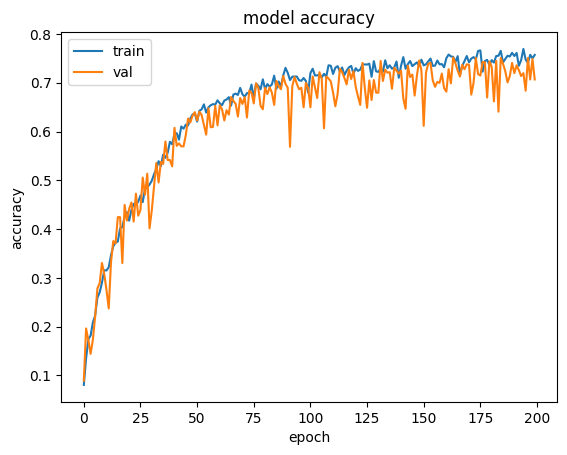

In [5]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

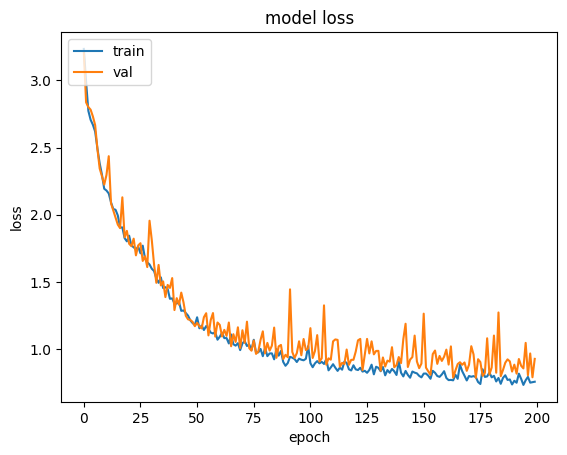

In [6]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()